In [108]:
# PCA is a way of converting the higher dimesnion data into a 
# lower dimension data by ensuring that it provides similar
# or maximum information

In [109]:
# steps involved in PCA:

# 1) Standardize the datapoints: brings all the data to a same scale.

# 2) Compute the covariance matrix:
#     i) Variance: it is the spread of the data from the mean or the average point.
#     ii) Covariance matrix: it calculates the measure of how two variables vary each other.

# 3) Compute the eigen values and the eigen vectors
#     i) Eigen value ------ magnitude
#     ii) Eigen vectgor -------- directional_link

# 4) sort the eigen values -------- if the eigen values is high, information spread is high

# 5) select the no of pc's ------- scree plot

# 6) interpret the new data

In [3]:
# Importing libararies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the dataset 

from sklearn import datasets
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
# 
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
# The images of the handwritten digits are contained in a digits.images array. 
# Each element of this array is an image that is represented by an 8x8 matrix of 
# numerical values that correspond to a grayscale from white, with a value of 0, 
# to black, with the value 15.
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

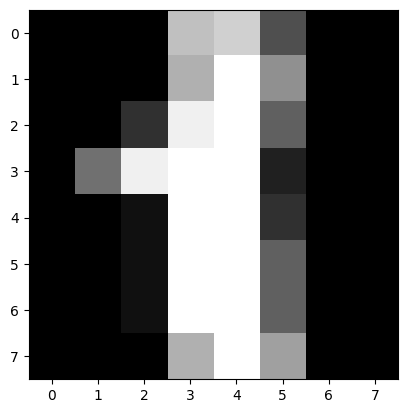

In [8]:
# to display the image in 2d in grayscale , here we are displaying 1 
plt.imshow(digits.images[1],cmap=plt.cm.gray)

In [9]:
# spliting the data where x contains images 
x = pd.DataFrame(digits.data)
x

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [10]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
# spliting the data where y contains corresponding value  
y = pd.DataFrame(digits.target)
y

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [12]:
from sklearn.preprocessing import StandardScaler
# standardization is the scaling technique where we make the mean as 0 and standard deviation as 1
# in pyhton we have the inbuilt function present for it

In [13]:
x_std = StandardScaler().fit_transform(x)
x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [14]:
x_std.shape

(1797, 64)

In [15]:
x1 = x_std.T
x1

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

In [16]:
x1.shape #-------------->64*64

(64, 1797)

In [17]:
#covariance matrix

cov_mat = np.cov(x1)

In [18]:
print(cov_mat)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.00055679  0.55692803 ... -0.02988686  0.02656195
  -0.04391324]
 [ 0.          0.55692803  1.00055679 ... -0.04120565  0.07263924
   0.08256908]
 ...
 [ 0.         -0.02988686 -0.04120565 ...  1.00055679  0.64868875
   0.26213704]
 [ 0.          0.02656195  0.07263924 ...  0.64868875  1.00055679
   0.62077355]
 [ 0.         -0.04391324  0.08256908 ...  0.26213704  0.62077355
   1.00055679]]


In [19]:
cov_mat.shape

(64, 64)

In [20]:
# eigen values and eigen vectors

eigen_val, eigen_vec = np.linalg.eig(cov_mat)

In [21]:
eigen_val

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [22]:
eigen_vec

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [23]:
len(eigen_val)

64

In [24]:
len(eigen_vec)

64

In [26]:
total = sum(eigen_val)
print(total)

61.033964365256246


In [27]:
7.34477606/61.03396436525629*100

12.033916093087718

In [28]:
var_exp = [(i/total)*100 for i in eigen_val]

In [29]:
var_exp

[12.033916097734894,
 9.561054403097884,
 8.444414892624563,
 6.498407907524179,
 4.8601548759664075,
 4.2141198692719515,
 3.9420828035673807,
 3.389380924638329,
 2.998221011625233,
 2.9320025512522165,
 2.7818054635503273,
 2.5770550925819933,
 2.2753033157642473,
 2.22717973951434,
 2.165229431849237,
 1.914166606442132,
 1.7755470851681974,
 1.6380692742844194,
 1.5964601688623399,
 1.489191187087823,
 1.3479695658179367,
 1.2719313702347568,
 1.165837350591948,
 1.0576465985363221,
 0.9753159471981127,
 0.9445589897319985,
 0.8630138269707233,
 0.8366428536685135,
 0.7976932484112402,
 0.7464713709260624,
 0.7255821513702759,
 0.6919112454811802,
 0.6539085355726166,
 0.6407925738459848,
 0.5913841117223416,
 0.5711624052235234,
 0.523636803416636,
 0.48180758644514166,
 0.08253509448180277,
 0.4537192598584488,
 0.103695730155717,
 0.4231627532327801,
 0.40605306997903834,
 0.39708480827582837,
 0.1251007424973014,
 0.13511841133708574,
 0.14776269410608758,
 0.1612360622567286,

In [30]:
#cumulative explained variance

cum_var_exp = np.cumsum(var_exp)

In [31]:
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.28356433,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

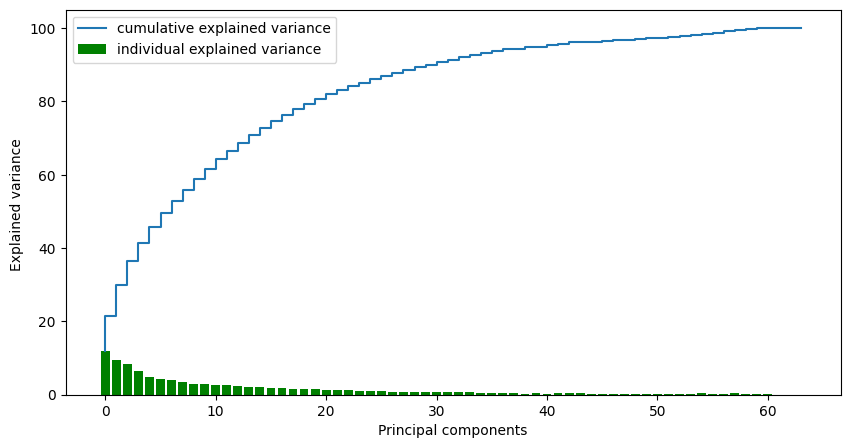

In [32]:
# whats the use of screeplot
# scree plot is a line plot of the eigenvalues of factors or principal components in an analysis
# scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_std, y, train_size = 0.8)

In [34]:
(1797/100)*80

1437.6

In [35]:
x_train.shape

(1437, 64)

In [36]:
(1797/100)*20

359.4

In [37]:
x_test.shape

(360, 64)

In [38]:
from sklearn.decomposition import PCA

In [39]:
# we can select the components from the scree plot or can directly pass the percentage of the information
# that we want to retain in the pca function

# pca = PCA(0.95)
pca = PCA(n_components= 20)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [40]:
pca_x_train.shape

(1437, 20)

In [41]:
pca_x_test.shape

(360, 20)

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt = DecisionTreeClassifier()

In [44]:
dt.fit(pca_x_train,y_train)

DecisionTreeClassifier()

In [45]:
predict = dt.predict(pca_x_test)

In [46]:
predict

array([4, 0, 2, 2, 0, 7, 5, 6, 7, 0, 7, 1, 7, 3, 3, 1, 7, 9, 2, 6, 7, 1,
       2, 8, 5, 5, 2, 8, 6, 7, 3, 7, 6, 6, 4, 0, 5, 0, 5, 7, 3, 9, 2, 9,
       7, 2, 4, 6, 0, 8, 9, 9, 2, 0, 6, 2, 5, 9, 0, 2, 0, 5, 4, 0, 1, 4,
       1, 8, 5, 2, 3, 7, 5, 4, 6, 7, 3, 2, 6, 9, 9, 0, 3, 9, 2, 3, 1, 8,
       6, 0, 3, 0, 5, 7, 9, 0, 6, 6, 1, 6, 5, 0, 2, 6, 0, 4, 4, 2, 0, 1,
       7, 5, 0, 3, 9, 7, 6, 8, 9, 1, 7, 8, 6, 4, 2, 5, 0, 1, 1, 6, 6, 6,
       3, 3, 0, 5, 6, 1, 9, 7, 8, 1, 3, 8, 3, 3, 1, 2, 3, 0, 7, 1, 6, 6,
       2, 0, 5, 5, 1, 3, 7, 0, 9, 8, 9, 4, 8, 6, 2, 6, 5, 0, 9, 9, 7, 4,
       5, 0, 8, 8, 7, 0, 5, 2, 3, 0, 7, 3, 9, 9, 7, 1, 1, 3, 2, 1, 3, 7,
       5, 4, 9, 1, 2, 1, 4, 3, 8, 0, 6, 4, 0, 5, 9, 9, 5, 5, 8, 2, 0, 9,
       9, 9, 3, 6, 8, 5, 1, 3, 8, 3, 7, 2, 1, 9, 1, 0, 3, 8, 1, 9, 7, 0,
       2, 1, 3, 7, 4, 4, 9, 0, 2, 9, 7, 1, 8, 2, 1, 1, 2, 6, 2, 1, 2, 1,
       4, 5, 5, 3, 6, 8, 9, 8, 1, 9, 0, 9, 8, 0, 2, 4, 9, 9, 9, 4, 9, 1,
       0, 6, 1, 1, 4, 8, 4, 9, 3, 0, 6, 6, 2, 0, 4,

In [47]:
y_test

,0
1512,4
1563,0
1232,2
1437,2
179,0
...,...
1130,3
630,8
1763,8
197,6


In [48]:
from sklearn.metrics import *

In [49]:
cm = confusion_matrix(y_test,predict)

In [50]:
cm.shape

(10, 10)

In [51]:
cm
# the diagonals in the matrix is returning the correctly classified data
# and the rest other is missclassified data

array([[41,  0,  0,  0,  0,  0,  0,  0,  0,  4],
       [ 0, 31,  1,  1,  0,  0,  2,  0,  0,  0],
       [ 0,  1, 33,  0,  0,  0,  0,  0,  1,  2],
       [ 0,  1,  2, 33,  0,  0,  1,  1,  4,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  1,  0, 29,  1,  0,  0,  4],
       [ 1,  2,  1,  0,  0,  0, 31,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1, 29,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 23,  3],
       [ 0,  2,  1,  1,  1,  3,  0,  0,  2, 32]], dtype=int64)

In [52]:
accuracy_score(y_test,predict)

0.8611111111111112

Using Wisconsin cancer data 

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [55]:
df=pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
scaler.fit(df)
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_data=scaler.transform(df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])